In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
# Set file path to csv and use file path to read CSV into a DataFrame and displaying a few rows
spy_csv = Path("CsvFiles/SPY.csv")
vgt_csv= Path("CsvFiles/VGT.csv")
# set file path to read CSV into a DataFrame
spy = pd.read_csv(spy_csv)
vgt = pd.read_csv(vgt_csv)

In [43]:
print(spy.head())
print(vgt.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2018-10-11  277.079987  278.899994  270.359985  272.170013  258.167450   
1  2018-10-12  276.769989  277.089996  272.369995  275.950012  261.752930   
2  2018-10-15  275.549988  277.040009  274.299988  274.399994  260.282654   
3  2018-10-16  276.600006  280.820007  276.070007  280.399994  265.973999   
4  2018-10-17  280.440002  281.149994  277.559998  280.450012  266.021454   

      Volume  
0  274840500  
1  183186500  
2  102263700  
3  118255800  
4  110626000  
         Date        Open        High         Low       Close   Adj Close  \
0  2018-10-11  185.429993  188.490005  182.259995  183.600006  177.754654   
1  2018-10-12  188.580002  189.850006  185.720001  189.259995  183.234406   
2  2018-10-15  188.809998  189.139999  186.259995  186.550003  180.610718   
3  2018-10-16  188.880005  192.940002  188.500000  192.350006  186.226074   
4  2018-10-17  192.830002  192.830002  190.000000  191.669998 

In [71]:
# Make a data frame containing VGT and XLF close price
close_df = pd.DataFrame()
close_df["Date"] = xlf["Date"]
close_df["SPY"] = spy["Close"]
close_df["VGT"] = vgt["Close"]
close_df = close_df.set_index(pd.DatetimeIndex(close_df["Date"].values))
close_df

Date         SPY         VGT
2018-10-11  2018-10-11  272.170013  183.600006
2018-10-12  2018-10-12  275.950012  189.259995
2018-10-15  2018-10-15  274.399994  186.550003
2018-10-16  2018-10-16  280.399994  192.350006
2018-10-17  2018-10-17  280.450012  191.669998
...                ...         ...         ...
2021-10-04  2021-10-04  428.640015  396.989990
2021-10-05  2021-10-05  433.100006  402.720001
2021-10-06  2021-10-06  434.899994  405.500000
2021-10-07  2021-10-07  438.660004  409.859985
2021-10-08  2021-10-08  437.859985  407.929993

[754 rows x 3 columns]

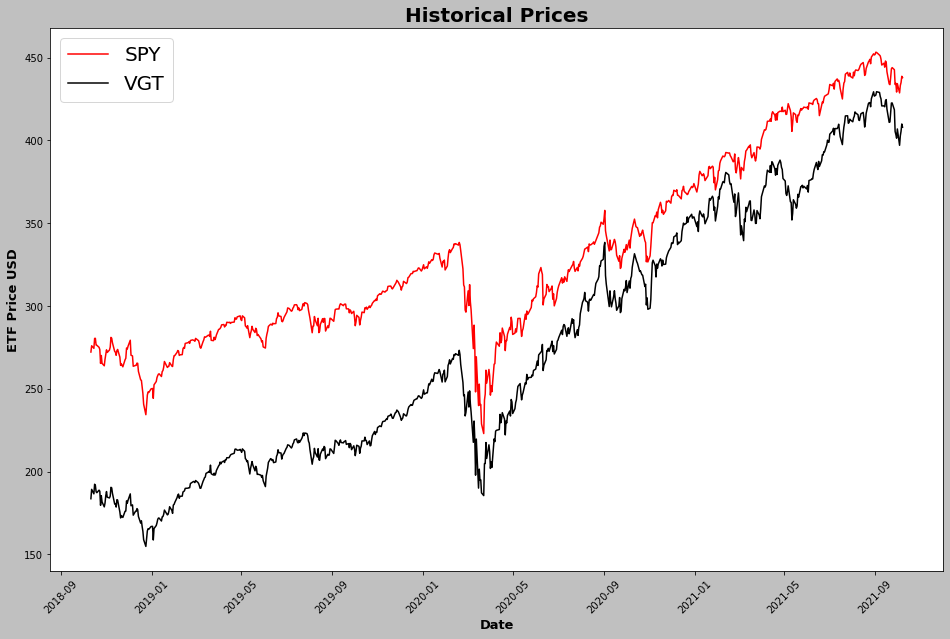

In [95]:
# Plot the data
plt.figure(figsize=(16,10),facecolor='silver')
plt.plot(close_df.index, close_df["SPY"], label="SPY", color="red")
plt.plot(close_df.index, close_df["VGT"], label="VGT",color="black")
plt.xlabel("Date",fontweight="bold",size=13)
plt.ylabel("ETF Price USD",fontweight="bold",size=13)
plt.legend(prop={"size":20})
plt.title("Historical Prices",fontweight="bold",size=20)
plt.xticks(rotation=45)
plt.show()

In [97]:
# Plot the price difference between Spy and Vgt
close_df["VGT-SPY Price Difference"]=close_df["VGT"]-close_df["SPY"]

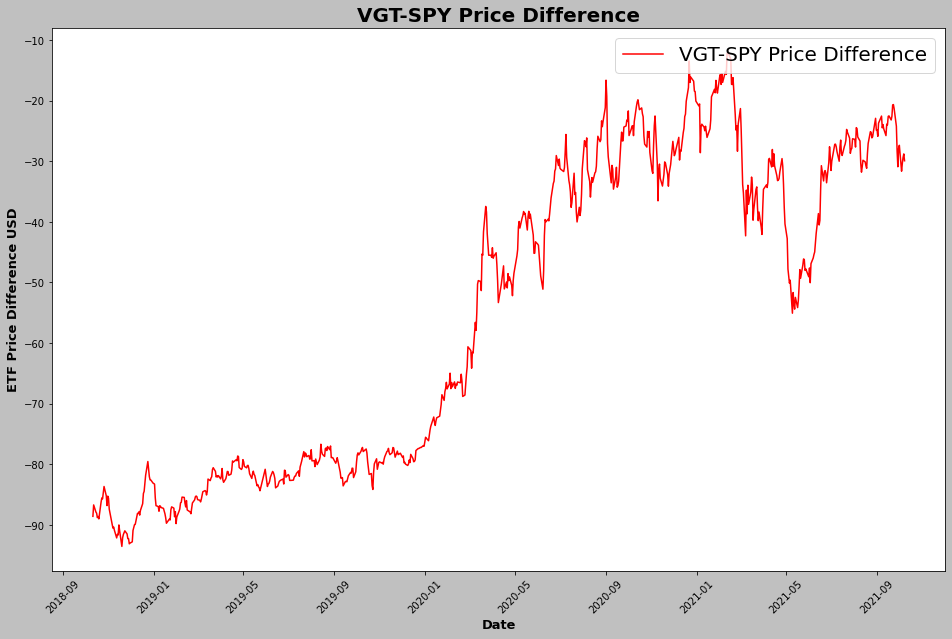

In [98]:
# Price Difference between Spy and Vgt. In 2018 there was a $90 difference in price. Around 2018 there was around a $90 price difference. In 2021 there is about a $30 difference.V
plt.figure(figsize=(16,10),facecolor='silver')
plt.plot(close_df.index, close_df["VGT-SPY Price Difference"], label="VGT-SPY Price Difference", color="red")
plt.xlabel("Date",fontweight="bold",size=13)
plt.ylabel("ETF Price Difference USD",fontweight="bold",size=13)
plt.legend(loc="upper right",prop={"size":20})
plt.title("VGT-SPY Price Difference",fontweight="bold",size=20)
plt.xticks(rotation=45)
plt.show()

In [102]:
# Getting daily returns 
daily_returns = close_df[["SPY","VGT"]].pct_change(1)
daily_returns

SPY       VGT
2018-10-11       NaN       NaN
2018-10-12  0.013888  0.030828
2018-10-15 -0.005617 -0.014319
2018-10-16  0.021866  0.031091
2018-10-17  0.000178 -0.003535
...              ...       ...
2021-10-04 -0.012896 -0.024259
2021-10-05  0.010405  0.014434
2021-10-06  0.004156  0.006903
2021-10-07  0.008646  0.010752
2021-10-08 -0.001824 -0.004709

[754 rows x 2 columns]

<AxesSubplot:>

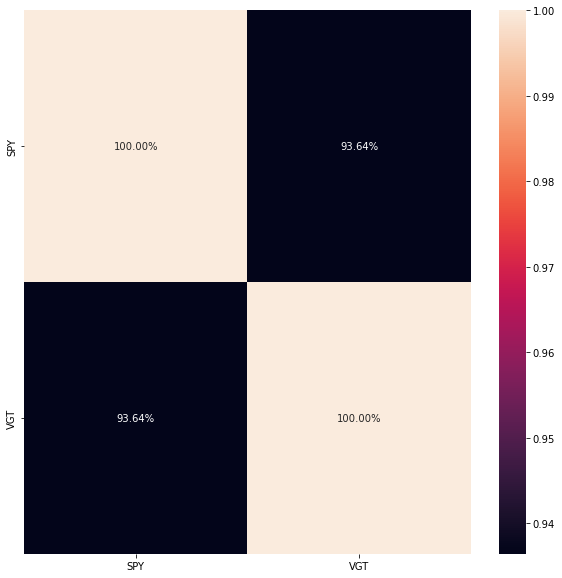

In [103]:
# Showing the correlation between both ETfs. Shows relationship between both etfs
plt.subplots(figsize=(10,10))
sns.heatmap(daily_returns.corr(), annot=True, fmt=".2%")
# SPY has a 93.64% correlation with VGT. Both ETFs seem to move similarly to each other. If one goes up the other one tends to follow. If one goes down the other one tends to follow.


In [104]:
# Showing the covariance. Covariance shows how stocks move together.
daily_returns.cov()

SPY       VGT
SPY  0.000204  0.000240
VGT  0.000240  0.000322

In [105]:
# Get the varience
daily_returns.var()

SPY    0.000204
VGT    0.000322
dtype: float64

In [108]:
# Getting the volitility. Shows us how risky these ETFs are. Volitilty is variance squared. # SPY has lower volitility than VGT. These both have low volitility. VGT is more riskier. 
daily_returns.std()*100


SPY    1.429346
VGT    1.794296
dtype: float64

In [113]:
# Show the average daily returns. We can expect SPY to give us around a .07 percent return based on the passed. We can expect VGT to give us around a .12 percent return based on the passed. VGT is more volitile but gives the more of a return compared to SPY
daily_returns.mean()*100

SPY    0.073441
VGT    0.122243
dtype: float64

In [110]:
# Annualized returns. SPY will gives us about a 18% annual return. VGT will give us a 30% return. 
# VGT gives about 12% more return compared to SPY but it is more volitile.
daily_returns.mean()*100*252

SPY    18.507248
VGT    30.805137
dtype: float64

In [4]:
daily_returns.head()

NameError: name 'daily_returns' is not defined

In [2]:
daily_returns.plot(title = "Daily Returns")

NameError: name 'daily_returns' is not defined

In [1]:
<matplotlib.axes._subplots.AxesSubplot at 0x1a28f1c510>

SyntaxError: invalid syntax (<ipython-input-1-d59048a9e222>, line 1)

In [3]:
# Plot the returns of the portfolio in terms of money
initial_investment = 10000
cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.plot(title = "Cumulative Profit")

NameError: name 'cumulative_returns' is not defined